<a href="https://colab.research.google.com/github/Kendi798/Appliances-energy-prediction/blob/main/Appliances_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Appliances Energy Prediction

In the context of global uncertainty, the demand for energy is increasing worldwide to support economic growth and improve the quality of life, especially in developing countries. However, many regions, particularly in the developing world, still face challenges with power outages. These outages are often caused by the excessive load consumed by household appliances, particularly heating and cooling devices. To address this issue, we aim to analyze the usage patterns of appliances in a residential setting using data collected from home sensors. The data consists of readings taken at 10-minute intervals over a period of 4.5 months. Our objective is to develop a model that can accurately predict the energy consumption of these appliances. By understanding and predicting appliance energy usage, we can effectively manage power resources and mitigate the risk of outages, ultimately improving energy reliability and availability.

Attribute Information:



1) Date, time year-month-day hour:minute:second


2) Appliances, energy use in Wh


3) lights, energy use of light fixtures in the house in Wh


4) T1, Temperature in kitchen area, in Celsius


5) RH_1, Humidity in kitchen area, in %


6) T2, Temperature in living room area, in Celsius


7) RH_2, Humidity in living room area, in %


8) T3, Temperature in laundry room area


9) RH_3, Humidity in laundry room area, in %


10) T4, Temperature in office room, in Celsius


11) RH_4, Humidity in office room, in %


12) T5, Temperature in bathroom, in Celsius


13) RH_5, Humidity in bathroom, in %


14) T6, Temperature outside the building (north side), in Celsius


15) RH_6, Humidity outside the building (north side), in %


16) T7, Temperature in ironing room , in Celsius


17) RH_7, Humidity in ironing room, in %


18) T8, Temperature in teenager room 2, in Celsius


19) RH_8, Humidity in teenager room 2, in %


20) T9, Temperature in parents room, in Celsius


21) RH_9, Humidity in parents room, in %


22) To, Temperature outside (from Chievres weather station), in Celsius


23) Pressure (from Chievres weather station), in mm Hg


24) RH_out, Humidity outside (from Chievres weather station), in %


25) Wind speed (from Chievres weather station), in m/s


26) Visibility (from Chievres weather station), in km


27) Tdewpoint (from Chievres weather station), Â°C


28) rv1, Random variable 1, nondimensional


29) rv2, Random variable 2, nondimensional

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
Energy=pd.read_csv('/content/drive/MyDrive/Hamoye csv files/energydata_complete.csv')
pd.set_option('display.max_columns', None)

In [3]:
Energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
Energy.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,52.400000,24.796667,1.0,24.500000,44.500000,24.7000,50.07400,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,52.326667,24.196667,1.0,24.557143,44.414286,24.7000,49.79000,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,52.266667,23.626667,1.0,24.540000,44.400000,24.7000,49.66000,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,52.200000,22.433333,1.0,24.500000,44.295714,24.6625,49.51875,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,52.200000,21.026667,1.0,24.500000,44.054000,24.7360,49.73600,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [5]:
Energy.Appliances.unique()

array([  60,   50,   70,  230,  580,  430,  250,  100,   90,   80,  140,
        120,  190,  110,  400,  390,  240,   40,   30,  310,  380,  370,
         20,  260,  500,  450,  220,  170,  290,  130,  200,  210,  180,
        350,  300,  340,  150,  330,  420,  520,  360,  270,  550,  690,
        620,  610,  490,  410,  320,  740,  910,  510,  790,  460,  160,
        480,  280,  560, 1080,  750,  470,  440,  800,  540,  530,  660,
        630,  600,   10,  570,  830, 1070,  890,  590,  850,  710,  680,
        670,  780,  640,  650,  700,  770,  720,  760,  860,  880,  730,
        900,  820,  870,  840])

In [6]:
Energy.lights.unique()

array([30, 40, 50, 70, 60, 10, 20,  0])

In [7]:

pd.set_option('display.max_columns', None)
Energy.date.unique()

array(['2016-01-11 17:00:00', '2016-01-11 17:10:00',
       '2016-01-11 17:20:00', ..., '2016-05-27 17:40:00',
       '2016-05-27 17:50:00', '2016-05-27 18:00:00'], dtype=object)

In [8]:
#Changing the date variable from object to date time
Energy['date'] = pd.to_datetime(Energy['date'])

In [9]:
# Extract month
Energy['Month'] = Energy['date'].dt.strftime('%b')

# Extract year
Energy['Year'] = Energy['date'].dt.year

# Extract time
Energy['Time'] = Energy['date'].dt.time

In [10]:
# Create a new column 'DayOfWeek' to store the weekday information
Energy['DayOfWeek'] = Energy['date'].dt.day_name()

# Filter the DataFrame to show only weekdays
weekday_data = Energy[Energy['DayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

# Filter the DataFrame to show only weekends
weekend_data = Energy[Energy['DayOfWeek'].isin(['Saturday', 'Sunday'])]
Energy['DayOfWeek'] = Energy['DayOfWeek'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')


In [11]:
Energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Month,Year,Time,DayOfWeek
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,Jan,2016,17:00:00,Weekday
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,Jan,2016,17:10:00,Weekday
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,Jan,2016,17:20:00,Weekday
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,Jan,2016,17:30:00,Weekday
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,Jan,2016,17:40:00,Weekday


In [12]:
Energy.isnull().sum().sum()

0

The dataset has no null values

In [13]:
Energy.duplicated().sum()

0

The dataset has no duplicates

In [14]:
Energy.shape

(19735, 33)

The dataset has 19735 rows and 29 columns

In [15]:
Energy.dtypes

date           datetime64[ns]
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1                   float64
rv2                   float64
Month                  object
Year                    int64
Time                   object
DayOfWeek              object
dtype: obj

The dataset variable are all floats except from date appliance and light.We notice that the date variable should be chaned to date time

In [16]:
Energy.dtypes

date           datetime64[ns]
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1                   float64
rv2                   float64
Month                  object
Year                    int64
Time                   object
DayOfWeek              object
dtype: obj

In [17]:
Energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [18]:
 Energy.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Year
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.0
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033,2016.0
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634,0.0
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,2016.0
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,2016.0
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653,2016.0
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769,2016.0
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,2016.0


We notice that there is a weak correlation among the variables such as appliances against to light,Windspeed,Visibility and	Tdewpoint
and notice a strong correlation Rh-1 to T1 and t5,t4 and t3,basically strong correlation is noted on most variables against RH-1

#EXPLORATORY DATA ANALYSIS - EDA
##a) Univariate Analysis
Univariate analysis is a statistical analysis technique that focuses on examining and summarizing a single variable in isolation. It involves analyzing and describing the distribution, central tendency, dispersion, and other characteristics of a single variable without considering the relationship with other variables.

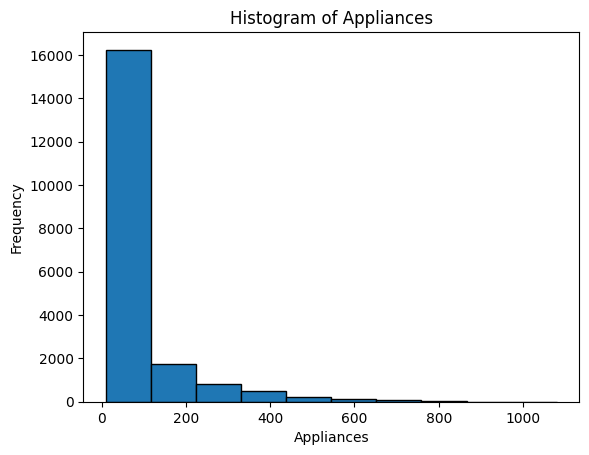

In [19]:
data = Energy['Appliances']

# Create the histogram
plt.hist(data, bins=10, edgecolor='black')

# Add labels and title
plt.xlabel('Appliances')
plt.ylabel('Frequency')
plt.title('Histogram of Appliances')

# Display the histogram
plt.show()

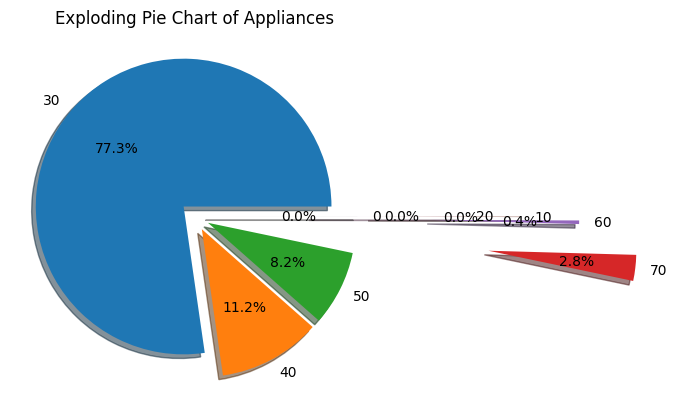

In [20]:
data = Energy['lights']

# Create a list of labels for the pie chart
labels = data.unique()

# Create the exploding pie chart
explode = [0.1] * len(labels)  # Explode all slices by the same amount (0.1)
explode[6] = 0.2
explode[6] = 0.4
explode[6] = 0.8
explode[5] = 1.2
explode[4] = 1.6
explode[3] = 2.0# Increase the explode value for the first slice

plt.pie(data.value_counts(), labels=labels, explode=explode, autopct='%1.1f%%',shadow=True)

# Add a title
plt.title('Exploding Pie Chart of Appliances')

# Display the pie chart
plt.show()

##b) Bivariate Analysis


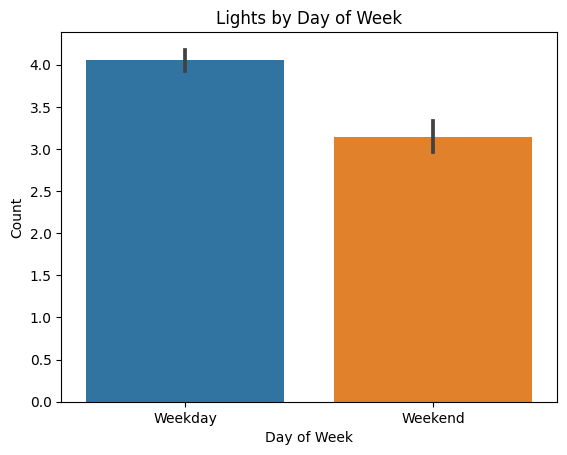

In [21]:
#Understanding energy use between the weekende and weekday
sns.barplot(x='DayOfWeek', y='lights', data=Energy)
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Lights by Day of Week')
plt.show()

**Observation**

The above boxplot shows that the energy use fixteures in the house is more during the weekday compared to weekend

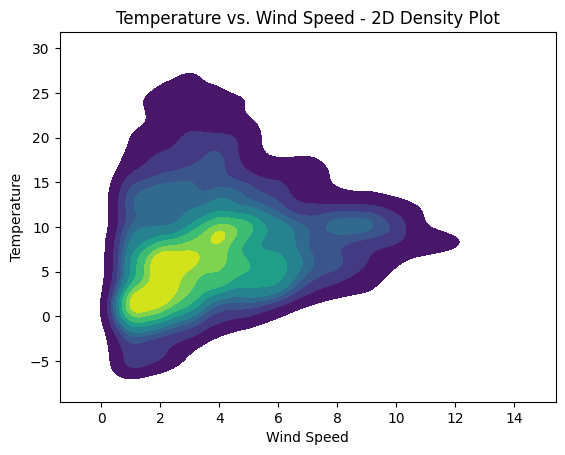

In [22]:
sns.kdeplot(x='Windspeed', y='T6', data=Energy, cmap='viridis', fill=True)
plt.xlabel('Wind Speed')
plt.ylabel('Temperature')
plt.title('Temperature vs. Wind Speed - 2D Density Plot')
plt.show()

**Observation**

This shows the speed of wind against the temprature outside the building.
The 2d plot shows that when the temprature is high the speed of wind is low

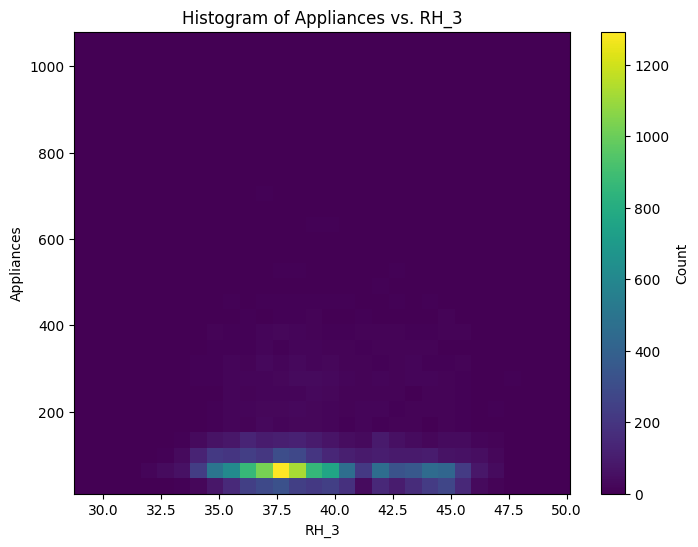

In [23]:
plt.figure(figsize=(8, 6))
plt.hist2d(x=Energy['RH_3'], y=Energy['Appliances'], bins=30, cmap='viridis')
plt.colorbar(label='Count')
plt.xlabel('RH_3')
plt.ylabel('Appliances')
plt.title('Histogram of Appliances vs. RH_3')
plt.show()

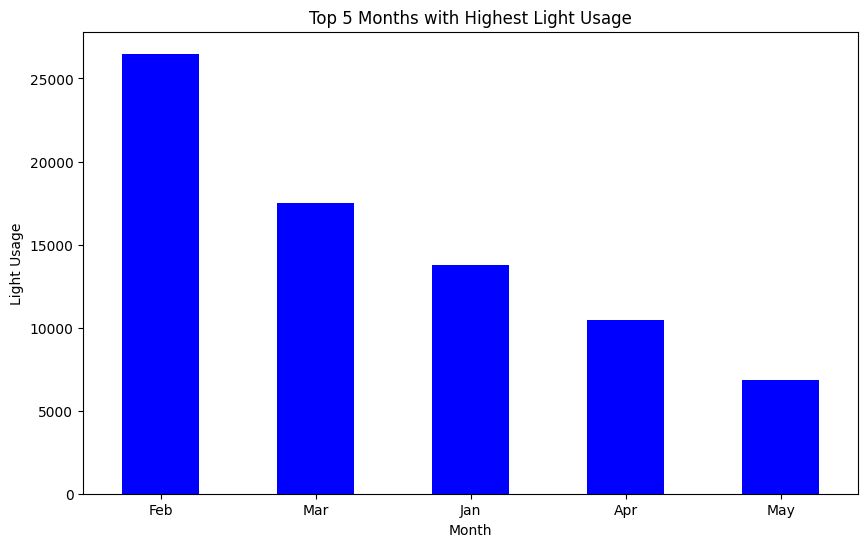

In [24]:
#Checking for the top 5 months with highest light usage
monthly_light = Energy.groupby('Month')['lights'].sum()

# Sorting data in descending order
top_5_months = monthly_light.sort_values(ascending=False).head(5)

# Plot the top 5 months
plt.figure(figsize=(10, 6))
top_5_months.plot(kind='bar', color='blue')
plt.xlabel('Month')
plt.ylabel('Light Usage')
plt.title('Top 5 Months with Highest Light Usage')
plt.xticks(rotation=0)
plt.show()

**Observation**

February is the month with the most light usage followed with March maybe because of the rainy/snowy weather observed durinng those months.

##c) Multivariate Analysis

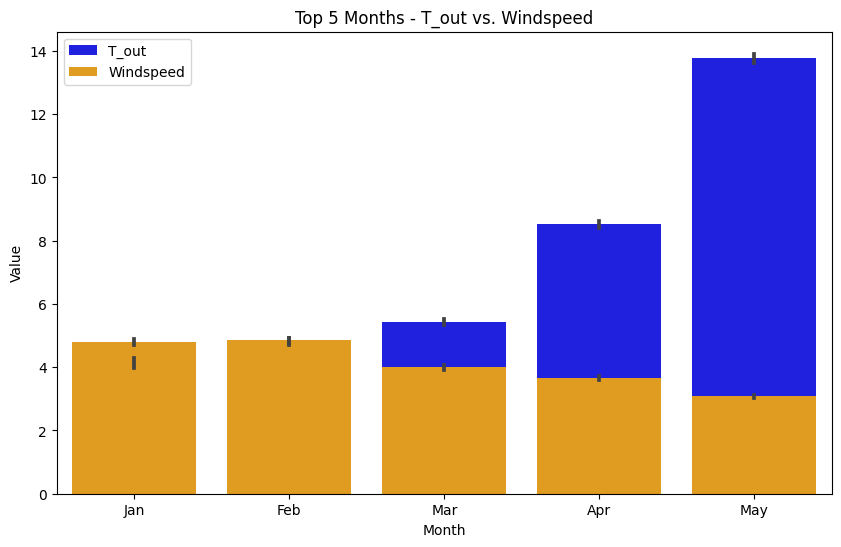

In [25]:
# Top 5 months temprature outside and windspeed
top_5_months = Energy['Month'].value_counts().head(5).index
filtered_data = Energy[Energy['Month'].isin(top_5_months)]

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_data, x='Month', y='T_out', color='blue', label='T_out')
sns.barplot(data=filtered_data, x='Month', y='Windspeed', color='orange', label='Windspeed')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Top 5 Months - T_out vs. Windspeed')
plt.legend()
plt.show()

**Observation**

When the temprature outside is high the wind speed tends to be low as viewed in the month of May.In January it shows that windspeed was high at aproximately 4.8 and the Temprature outside was at 4.

In [26]:
Energy.corr()

<ipython-input-26-1735fd25d642>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Energy.corr()


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Year
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,0.019760,0.006955,0.117638,-0.083178,0.025801,-0.055642,0.039572,-0.094039,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145,NaN
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,-0.078745,0.141233,-0.079029,0.153756,-0.135347,0.035069,-0.071458,0.012915,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521,NaN
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,-0.014782,0.654769,-0.615045,0.838705,0.135182,0.825413,-0.006441,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203,NaN
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,0.303258,0.316141,0.245126,0.021397,0.801122,-0.030053,0.736196,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699,NaN
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,0.029595,0.801186,-0.580372,0.663660,0.229212,0.578191,0.068534,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087,NaN
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,0.250271,-0.009670,0.389933,-0.051422,0.690584,-0.041023,0.679777,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275,NaN
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,-0.066355,0.686882,-0.647672,0.847374,0.172624,0.795283,0.044427,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194,NaN
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,0.375422,0.076833,0.514912,-0.250090,0.832685,-0.283228,0.828822,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477,NaN
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,-0.076489,0.652350,-0.703149,0.877763,0.043527,0.796256,-0.095192,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815,NaN
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,0.352591,0.259047,0.392178,-0.131204,0.894301,-0.167066,0.847259,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787,NaN


<ipython-input-27-6e37e42d2275>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Energy.corr(), annot= True,)


<Axes: >

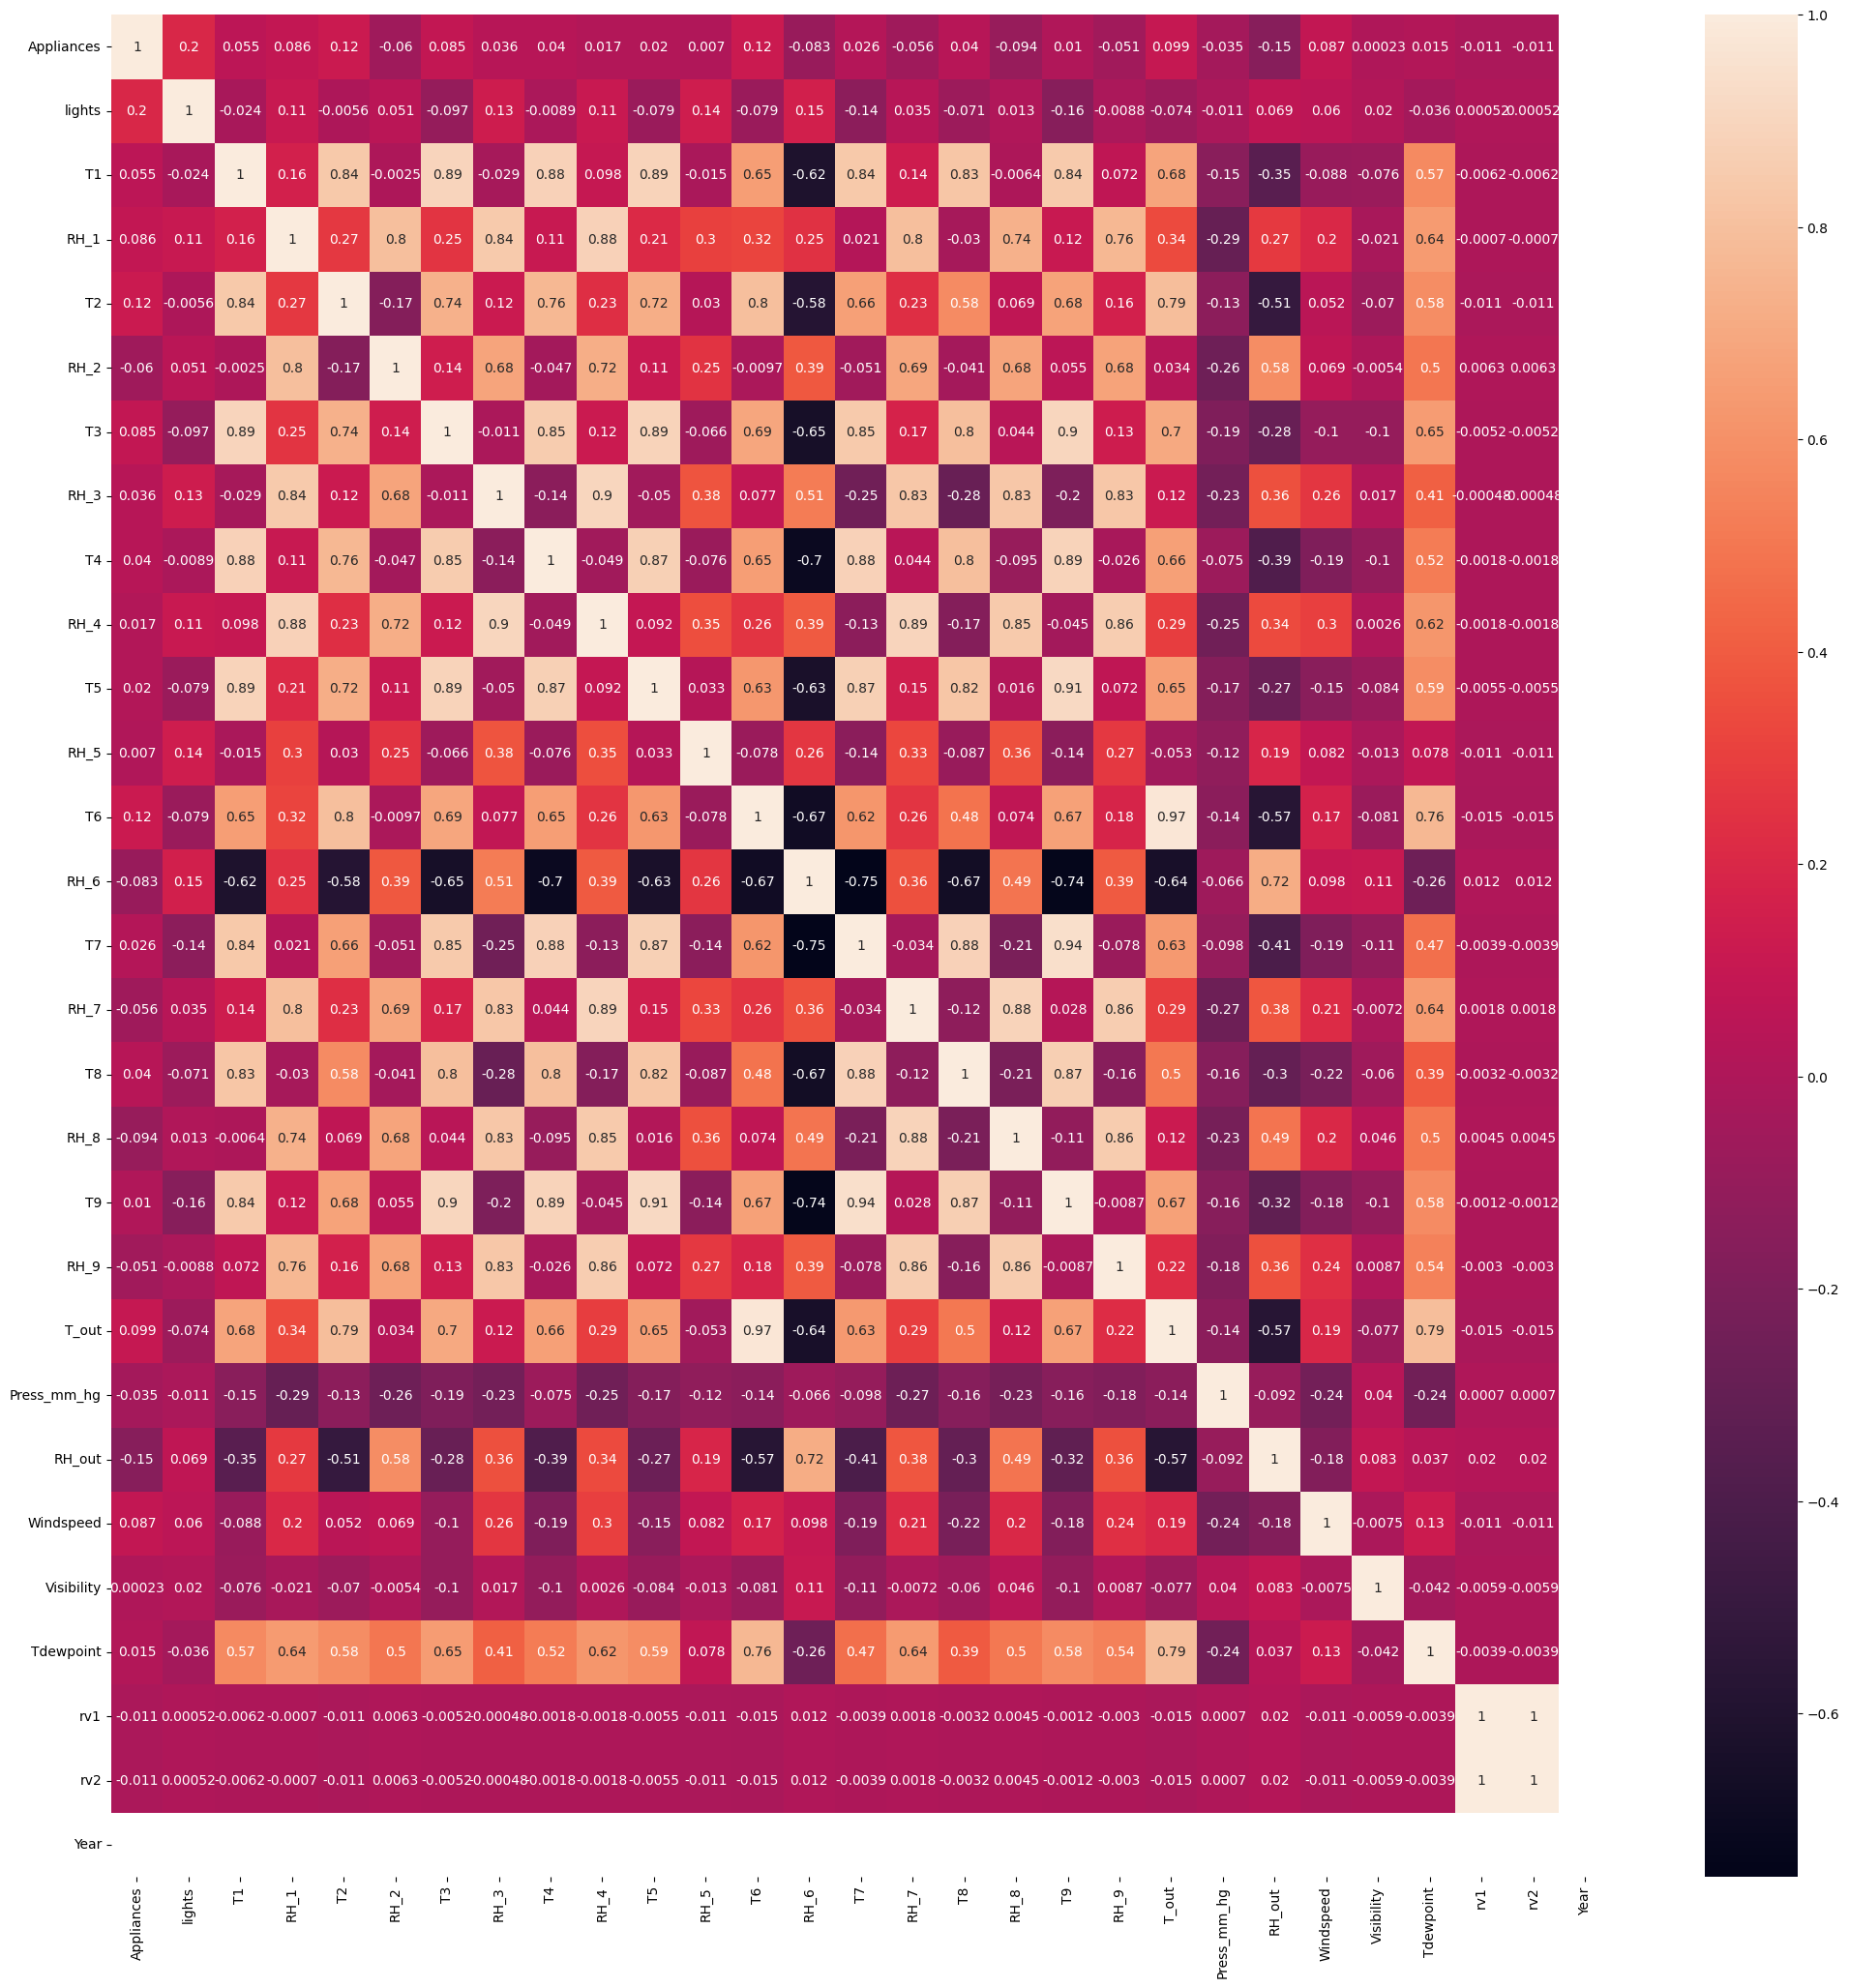

In [27]:
#Correlation Heat Map
plt.figure(figsize=(25,25))
sns.heatmap(Energy.corr(), annot= True,)

#IMPLEMENTING THE SOLUTION
##a) SPLIT , TRAIN AND TEST

In [28]:
#Assigning the feature variable
X = Energy['Appliances']
y = Energy['T6']

In [29]:
#Splitting the data into train 80% and test 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.8, test_size = 0.2, random_state = 100 )

In [30]:
# Checking the shapes of our feature variables
X.shape, X_train.shape, X_test.shape

((19735,), (15788,), (3947,))

**Observations**
> Our feature variables have 19735 rows and 32 columns, X_train has 14801 rows and 32 columns and X_test has 4934 rows and 32 columns.This shows that our dataset is imbalanced.

<Axes: xlabel='Appliances', ylabel='T6'>

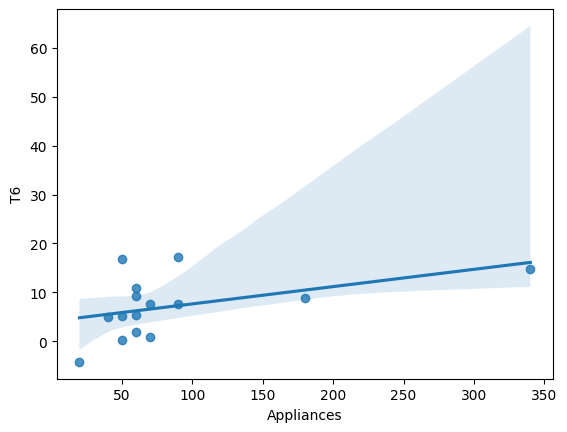

In [31]:
#Performing linear regression
simple_linear_reg_Energy=Energy[["Appliances","T6"]].sample(15,random_state=2)
sns.regplot(x="Appliances",y="T6",data=simple_linear_reg_Energy)

<Axes: xlabel='T2', ylabel='T6'>

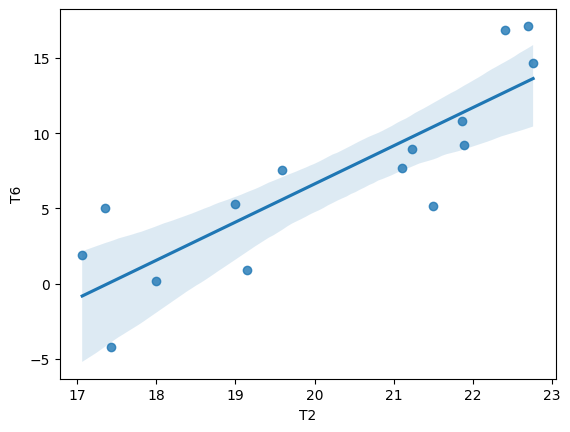

In [32]:
simple_linear_reg_Energy=Energy[["T2","T6"]].sample(15,random_state=2)
sns.regplot(x="T2",y="T6",data=simple_linear_reg_Energy)

###IMPLEMENTING THE SOLUTION
LINEAR REGRESSION

In [33]:
#Assigning the feature variable
X = Energy['T2']
y = Energy['T6']

In [34]:
#Splitting the data into train 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.8, test_size = 0.2, random_state = 100 )

In [35]:
#Checking the shape of the train and test
print(X_train.shape)
print(y_train.shape)
print( X_test.shape )
print( y_test.shape )

(15788,)
(15788,)
(3947,)
(3947,)


<Axes: xlabel='T2', ylabel='T6'>

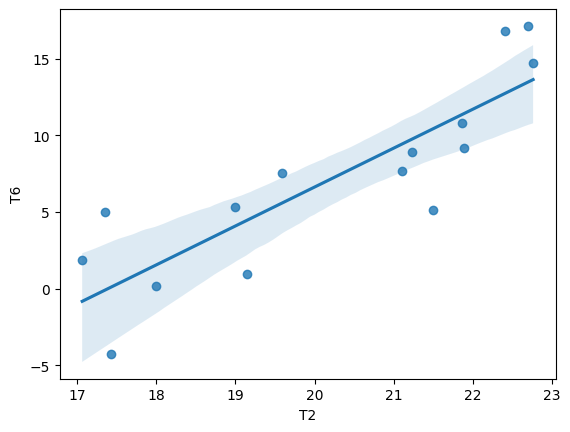

In [36]:
simple_linear_reg_Energy=Energy[["T2","T6"]].sample(15,random_state=2)
sns.regplot(x="T2",y="T6",data=simple_linear_reg_Energy)

In [37]:
import statsmodels.api as sm
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [38]:
lr.params

const   -37.178284
T2        2.216716
dtype: float64

In [39]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     T6   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                 2.844e+04
Date:                Sat, 17 Jun 2023   Prob (F-statistic):               0.00
Time:                        06:54:28   Log-Likelihood:                -42752.
No. Observations:               15788   AIC:                         8.551e+04
Df Residuals:                   15786   BIC:                         8.552e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.1783      0.269   -138.169      0.000     -37.706     -36.651
T2             2.2167      0.013    168.634      0.000       2.191       2.242
==============================================================================
Omnibus:                      716.859   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              830.511
Skew:                          -0.523   Prob(JB):                    4.54e-181
Kurtosis:                       3.410   Cond. No.                         191.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#CHALLENGING THE SOLUTION

In [40]:
Energy_df=Energy.head()
Energy_df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Month,Year,Time,DayOfWeek
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,Jan,2016,17:00:00,Weekday
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,Jan,2016,17:10:00,Weekday
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,Jan,2016,17:20:00,Weekday
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,Jan,2016,17:30:00,Weekday
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,Jan,2016,17:40:00,Weekday


In [41]:
#Dropping the date and lights column
Energy_data=Energy_df.drop(['date','lights','Time','Month','Year','DayOfWeek'],axis=1)
Energy_data

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [42]:
Energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   5 non-null      int64  
 1   T1           5 non-null      float64
 2   RH_1         5 non-null      float64
 3   T2           5 non-null      float64
 4   RH_2         5 non-null      float64
 5   T3           5 non-null      float64
 6   RH_3         5 non-null      float64
 7   T4           5 non-null      float64
 8   RH_4         5 non-null      float64
 9   T5           5 non-null      float64
 10  RH_5         5 non-null      float64
 11  T6           5 non-null      float64
 12  RH_6         5 non-null      float64
 13  T7           5 non-null      float64
 14  RH_7         5 non-null      float64
 15  T8           5 non-null      float64
 16  RH_8         5 non-null      float64
 17  T9           5 non-null      float64
 18  RH_9         5 non-null      float64
 19  T_out       

In [43]:
# converting 'Weight' and 'Salary' from float to int
Energy_data = Energy_data.astype({"T1":'int', "RH_1":'int',"T2":'int', "RH_2":'int',"T3":'int', "RH_3":'int',"T4":'int', "RH_4":'int',"T5":'int', "RH_5":'int',"T6":'int', "RH_6":'int',
                                  "T7":'int', "RH_7":'int',"T8":'int', "RH_8":'int',"T9":'int', "RH_9":'int',"T_out":'int', "Press_mm_hg":'int', "RH_out":'int',
                                  "Windspeed":'int', "Visibility":'int', "Tdewpoint":'int', "rv1":'int', "rv2":'int'})

In [44]:
Energy_data

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19,47,19,44,19,44,19,45,17,55,7,84,17,41,18,48,17,45,6,733,92,7,63,5,13,13
1,60,19,46,19,44,19,44,19,45,17,55,6,84,17,41,18,48,17,45,6,733,92,6,59,5,18,18
2,50,19,46,19,44,19,44,18,45,17,55,6,83,17,41,18,48,17,45,6,733,92,6,55,5,28,28
3,50,19,46,19,44,19,45,18,45,17,55,6,83,17,41,18,48,17,45,6,733,92,6,51,5,45,45
4,60,19,46,19,44,19,45,18,45,17,55,6,84,17,41,18,48,17,45,6,733,92,5,47,4,10,10


In [45]:
Energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Appliances   5 non-null      int64
 1   T1           5 non-null      int64
 2   RH_1         5 non-null      int64
 3   T2           5 non-null      int64
 4   RH_2         5 non-null      int64
 5   T3           5 non-null      int64
 6   RH_3         5 non-null      int64
 7   T4           5 non-null      int64
 8   RH_4         5 non-null      int64
 9   T5           5 non-null      int64
 10  RH_5         5 non-null      int64
 11  T6           5 non-null      int64
 12  RH_6         5 non-null      int64
 13  T7           5 non-null      int64
 14  RH_7         5 non-null      int64
 15  T8           5 non-null      int64
 16  RH_8         5 non-null      int64
 17  T9           5 non-null      int64
 18  RH_9         5 non-null      int64
 19  T_out        5 non-null      int64
 20  Press_mm_hg  5

In [46]:
# Splitting the dataset into train and test using train test split

from sklearn.model_selection import train_test_split

X=Energy_data.drop('Appliances',axis=1)
y=Energy_data['Appliances']


In [47]:
#Splitting the data into train 70% and test 30%
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, test_size = 0.3, random_state =42  )

In [48]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [49]:
#Predictint the test
y_pred=linreg.predict(X_test)
y_pred

array([54.21284244, 30.10149577])

#EVALUATING THE MODEL